## Assignment 3: Week 3 - Analyse customer sentiments with reviews

Various other toys and games: Leaders at Turtle Games understand that in order to maximise sales performance, they must be offering products their customers are satisfied with. The wrong products, or underperforming products, will limit sales potential.

* Using the reviews collected from Turtle Games’ e-store, identify the customer sentiments based on their reviews for toys and games.

    1. What is the general sentiment of customers across all products?
    2. Based on the polarity of the sentiment, what are the top 20 positive and top 20 negative reviews?

## 1. Import libraries

In [15]:
# Import libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd

# Remove warning messages
import warnings
warnings.filterwarnings('ignore')

## 2. Load Game Reviews Dataset

In [16]:
# Define directory
!pwd

/Users/hazel/Documents/LSE Data Analytics/Course 3 - Advanced Analytics/Assignment 3


In [17]:
# Assign path to 'dir' variable
dir = '/Users/hazel/Documents/LSE Data Analytics/Course 3 - Advanced Analytics/Assignment 3/game_data/'

In [18]:
# Import game reviews data set
reviews_data = pd.read_csv(dir + 'game_reviews.csv')

# View dataframe
reviews_data.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.",The fact that 50% of this space is wasted on art (and not terribly informative or needed art ...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,"An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are ""meh"". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the ""Storm King's Thunder"" adventure. Even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. I massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. And the few table you have are nigh-useless themselves.\n\nIn short, stop making crap DM screens.",Another worthless Dungeon Master's screen from GaleForce9,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are filled with a general Forgotten Realms map is beyond me. Most of one of them is all blue ocean. Such a waste.\n\nI don't understand why they can't make these DM Screens more useful for these ""kinds of adventures"" rather than solely the specific adventure. You're supposed to be able to transpose this adventure to other lands outside the Forgotten Realms. So even just a list of new monsters or NPCs would at least be useful than the map. Even more would just be stuff related to running the game but broad-use stuff related to giants.\n\nSame thing with Curse of Strahd. Why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out Castle Ravenloft, which is only useful during a small fraction of the time even for the Curse of Strahd adventure, let alone various other Ravenloft adventuring.\n\nThey really kill the extended use of these screens by not thinking about their potential use, both for the adventure in question, as well as use in a broader sense.\n\nThe Rage of Demons screen is far more useful for broad under dark adventuring - covering a lot of rules for the various conditions you may suffer... and the map is only one panel.\n\nThis Storm Giants one is decent for a few tables it includes - but really misses the mark. Maybe they should ask a few DMs what they would use?","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new dm and it's perfect!,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,"As my review of GF9's previous screens these were completely unnecessary and nearly useless. Skip them, this is the definition of a waste of money.",Money trap,1486512000,NaN


In [19]:
# View information about dataframe

reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         15000 non-null  int64 
 1   verified        15000 non-null  bool  
 2   reviewTime      15000 non-null  object
 3   reviewerID      15000 non-null  object
 4   reviewerName    15000 non-null  object
 5   reviewText      14990 non-null  object
 6   summary         14998 non-null  object
 7   unixReviewTime  15000 non-null  int64 
 8   image           160 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 952.3+ KB


In [20]:
# Create subset with reviewText and summary columns
reviews_sum = reviews_data[['reviewText', 'summary']]

In [21]:
# View all text output in dataframe
pd.set_option('display.max_colwidth', 1)

# View review dataframe
reviews_sum.head()

,reviewText,summary
0,"When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.",The fact that 50% of this space is wasted on art (and not terribly informative or needed art ...
1,"An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are ""meh"". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the ""Storm King's Thunder"" adventure. Even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. I massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. And the few table you have are nigh-useless themselves.\n\nIn short, stop making crap DM screens.",Another worthless Dungeon Master's screen from GaleForce9
2,"Nice art, nice printing. Why two panels are filled with a general Forgotten Realms map is beyond me. Most of one of them is all blue ocean. Such a waste.\n\nI don't understand why they can't make these DM Screens more useful for these ""kinds of adventures"" rather than solely the specific adventure. You're supposed to be able to transpose this adventure to other lands outside the Forgotten Realms. So even just a list of new monsters or NPCs would at least be useful than the map. Even more would just be stuff related to running the game but broad-use stuff related to giants.\n\nSame thing with Curse of Strahd. Why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out Castle Ravenloft, which is only useful during a small fraction of the time even for the Curse of Strahd adventure, let alone various other Ravenloft adventuring.\n\nThey really kill the extended use of these screens by not thinking about their potential use, both for the adventure in question, as well as use in a broader sense.\n\nThe Rage of Demons screen is far more useful for broad under dark adventuring - covering a lot of rules for the various conditions you may suffer... and the map is only one panel.\n\nThis Storm Giants one is decent for a few tables it includes - but really misses the mark. Maybe they should ask a few DMs what they would use?","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new dm and it's perfect!,Five Stars
4,"As my review of GF9's previous screens these were completely unnecessary and nearly useless. Skip them, this is the definition of a waste of money.",Money trap


Summary is too short for sentiment analysis. Review full text should be used.

## 2. Extract the column that contains all the reviews for analysing the text

### Create subset with relevant variables only

In [22]:
# Create reviewText only subset

reviews = reviews_data[['reviewText']]

# View new dataframe
reviews.head()

,reviewText
0,"When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely."
1,"An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are ""meh"". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the ""Storm King's Thunder"" adventure. Even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. I massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. And the few table you have are nigh-useless themselves.\n\nIn short, stop making crap DM screens."
2,"Nice art, nice printing. Why two panels are filled with a general Forgotten Realms map is beyond me. Most of one of them is all blue ocean. Such a waste.\n\nI don't understand why they can't make these DM Screens more useful for these ""kinds of adventures"" rather than solely the specific adventure. You're supposed to be able to transpose this adventure to other lands outside the Forgotten Realms. So even just a list of new monsters or NPCs would at least be useful than the map. Even more would just be stuff related to running the game but broad-use stuff related to giants.\n\nSame thing with Curse of Strahd. Why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out Castle Ravenloft, which is only useful during a small fraction of the time even for the Curse of Strahd adventure, let alone various other Ravenloft adventuring.\n\nThey really kill the extended use of these screens by not thinking about their potential use, both for the adventure in question, as well as use in a broader sense.\n\nThe Rage of Demons screen is far more useful for broad under dark adventuring - covering a lot of rules for the various conditions you may suffer... and the map is only one panel.\n\nThis Storm Giants one is decent for a few tables it includes - but really misses the mark. Maybe they should ask a few DMs what they would use?"
3,Amazing buy! Bought it as a gift for our new dm and it's perfect!
4,"As my review of GF9's previous screens these were completely unnecessary and nearly useless. Skip them, this is the definition of a waste of money."


In [23]:
# View shape of dataframe
reviews.shape

(15000, 1)

### Remove missing values

In [24]:
# Identify missing values in dataframe
reviews.isna().sum()

reviewText    10
dtype: int64

In [25]:
# Drop empty rows from dataframe
reviews.dropna(subset=['reviewText'], inplace=True)

# Confirm empty rows have been dropped
reviews.shape

(14990, 1)

### Convert words to lowercase

In [26]:
# Convert all words to lower case
reviews['reviewText'] = reviews['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
reviews['reviewText'].head()

0    when it comes to a dm's screen, the space on the screen itself is at an absolute premium. the fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. the only reason that i gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. other than that, it drops the ball completely.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### Remove all punctuation marks

In [27]:
# Remove all punctuation marks to standardise the text
reviews['reviewText'] = reviews['reviewText'].str.replace('[^\w\s]','')
reviews['reviewText'].head()

0    when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

### Drop duplicates from the review column

In [28]:
# Find duplicates
reviews.reviewText.duplicated().sum()

909

In [29]:
# Drop duplicates
reviews_clean = reviews.drop_duplicates(subset=['reviewText'])

In [30]:
# Ensure there are no more duplicates
reviews_clean.reviewText.duplicated().sum()

0

In [36]:
# Reset index and preview data
reviews_clean.reset_index(inplace=True)

# View clean dataframe
reviews_clean.head()

,index,reviewText
0,0,when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely
1,1,an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens
2,2,nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm giants one is decent for a few tables it includes but really misses the mark maybe they should ask a few dms what they would use
3,3,amazing buy bought it as a gift for our new dm and its perfect
4,4,as my review of gf9s previous screens these were completely unnecessary and nearly useless skip them this is the definition of a waste of money


In [19]:
# View shape of clean dataframe
reviews_clean.shape

(14081, 1)

## 3. Visualise the most frequently used words using WordCloud

In [37]:
# String all the reviews together in a single variable
all_reviews = ''
for i in range(reviews_clean.shape[0]):
    all_reviews = all_reviews + reviews_clean['reviewText'][i]

In [38]:
# Import wordcloud for visualisation
from wordcloud import WordCloud

sns.set(color_codes=True)

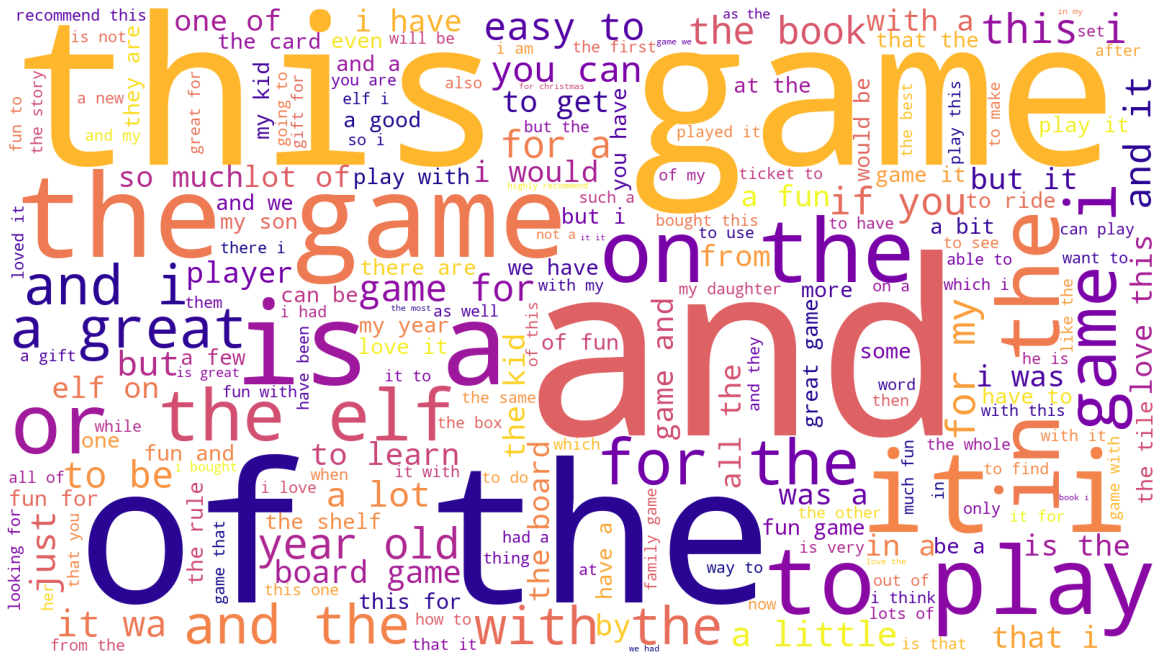

In [39]:
# Create WordCloud
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap ='plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Tokenisation: Convert text into tokens

**Report:** The large quantity of text needs to be divided into smaller parts called tokens. Then, these tokens can be used to find patterns in the review text.

In [43]:
# Install NLTK library
!pip install nltk

# Import all necessary libraries.
import nltk

# Install the required tokenisation model.
nltk.download('punkt')

# Install the required tokenisation function.
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/hazel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
# Apply tokenisation
reviews_clean['tokens'] = reviews_clean['reviewText'].apply(word_tokenize)
reviews_clean['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, space, on, the, screen, itself, is, at, an, absolute, premium, the, fact, that, 50, of, this, space, is, wasted, on, art, and, not, terribly, informative, or, needed, art, as, well, makes, it, completely, useless, the, only, reason, that, i, gave, it, 2, stars, and, not, 1, was, that, technically, speaking, it, can, at, least, still, stand, up, to, block, your, notes, and, dice, rolls, other, than, that, it, drops, the, ball, completely]                                                                                                                                                                                                                  
1    [an, open, letter, to, galeforce9, your, unpainted, miniatures, are, very, not, bad, your, spell, cards, are, great, your, board, games, are, meh, your, dm, screens, however, are, freaking, terrible, im, still, waiting, for, a, single, screen, that, isnt, polluted, with, pointless, artwork, whe

In [45]:
# Combine all tokens into one list
all_tokens = []
for i in range(reviews_clean.shape[0]):
    all_tokens = all_tokens + reviews_clean['tokens'][i]

In [ ]:
# [1] Import the class.
from nltk.probability import FreqDist

# [2] Create a frequency distribution object.
freq_dist_of_words = FreqDist(tokenized_word)

# [3] Show the five most common elements in the data set.
freq_dist_of_words.most_common(5)

In [54]:
#  Compute the tokens with the maximum frequency
from nltk.probability import FreqDist

# Create a frequency distribution object.
fdist = FreqDist(all_tokens)

# Show the five most common elements in the data set.
fdist.most_common(5)

[('the', 32797), ('to', 21453), ('and', 21000), ('a', 18570), ('it', 15144)]

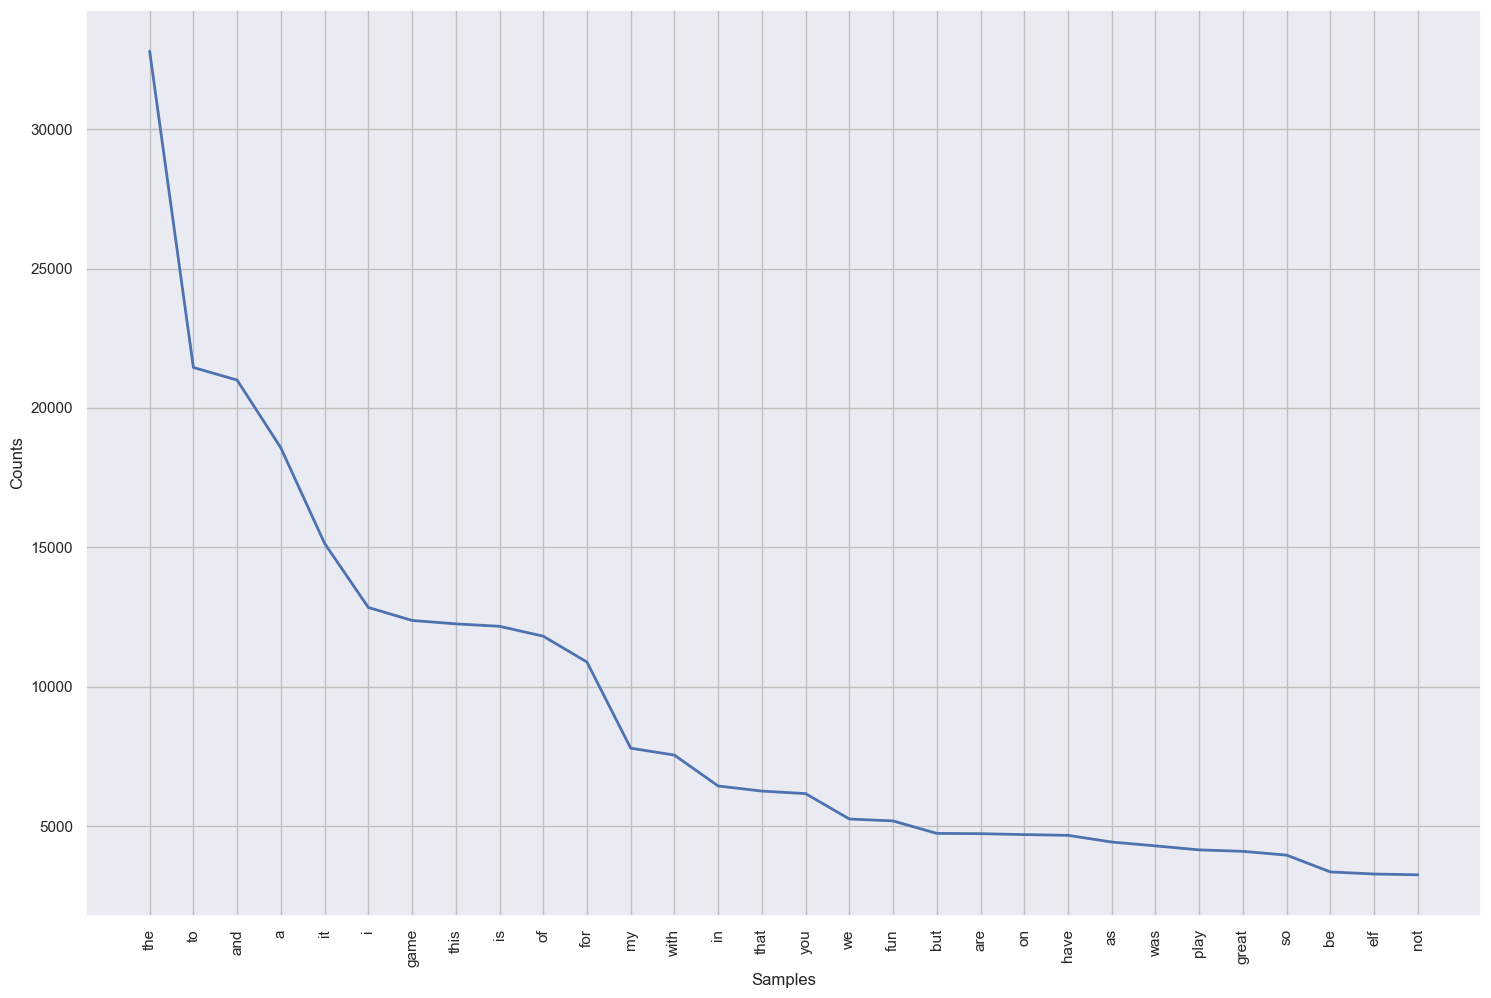

In [55]:
# [1] Import the package.
import matplotlib.pyplot as plt

# [2] Define the figure and axes.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(18, 12)

# [3] Plot the data set.
fdist.plot(30, cumulative=False)

# [4] Set the labels for the axes
ax.set_xlabel('Counts', fontsize=20)
ax.set_ylabel('Samples', fontsize=20)

# [5] Display the result.
plt.show()

In [56]:
# Filter out tokens that are neither alphabets or numbers (to eliminate punctuation marks etc)
tokens1 = [word for word in all_tokens if word.isalnum()]

## 5. Eliminate stopwords

In [58]:
# Download the nltk resource, import the method, and extract stopwords in the English language.
# [1] Import all necessary libraries.
import nltk

# [2] Download the stop words.
nltk.download('stopwords')

# [3] Import the package.
from nltk.corpus import stopwords

# [4] Create a set of English stop words.
stop_words=set(stopwords.words('english'))

# [5] Display the set.
print(stop_words)

{'you', 'why', 'have', 'then', 'll', 'didn', 'as', "isn't", 'mightn', 'd', 'such', 'himself', 's', 'through', 'at', 'm', 'few', 've', 'aren', "hadn't", 'how', 'yourselves', 'were', 'shan', 'do', 'over', 'further', 'herself', 'is', 'not', 'by', 'doesn', 'own', 'she', 'until', 'or', 'me', "haven't", "don't", 'an', 'again', 'he', 'which', 'yourself', "it's", 'under', 'being', 'and', 'wouldn', 'on', 'did', "couldn't", 'whom', 'any', 'all', 'than', 'against', 'this', 'nor', 'very', 'to', "shan't", "she's", 'who', 'if', 'into', 'shouldn', 'where', 'with', 'from', 'needn', 'has', "wouldn't", 'here', 'won', 'now', 'i', 'be', 'her', 'don', 're', 'mustn', 'same', 'ourselves', 'other', 'more', 'can', 'those', 'are', 'been', 'once', 'most', "you've", 'y', 'so', "doesn't", 'but', 'doing', 'them', 'our', 'it', 'just', "needn't", 't', 'between', 'their', 'out', 'there', "didn't", 'some', 'of', 'your', 'the', 'itself', 'o', 'what', "hasn't", 'they', 'that', 'my', 'ma', 'below', 'myself', 'am', 'both',

[nltk_data] Downloading package stopwords to /Users/hazel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# Create a list of tokens from the list of identified tokens after eliminating stopwords
tokens2 = [x for x in tokens1 if x.lower() not in stop_words]

In [72]:
len(tokens2)

354775

## 6. Visualise the tokens without stopwords in a word cloud

In [62]:
# Combine all tokens into one list excluding stop words
tokens2_string = ''
for value in tokens2:
    tokens2_string = tokens2_string + value + ' '

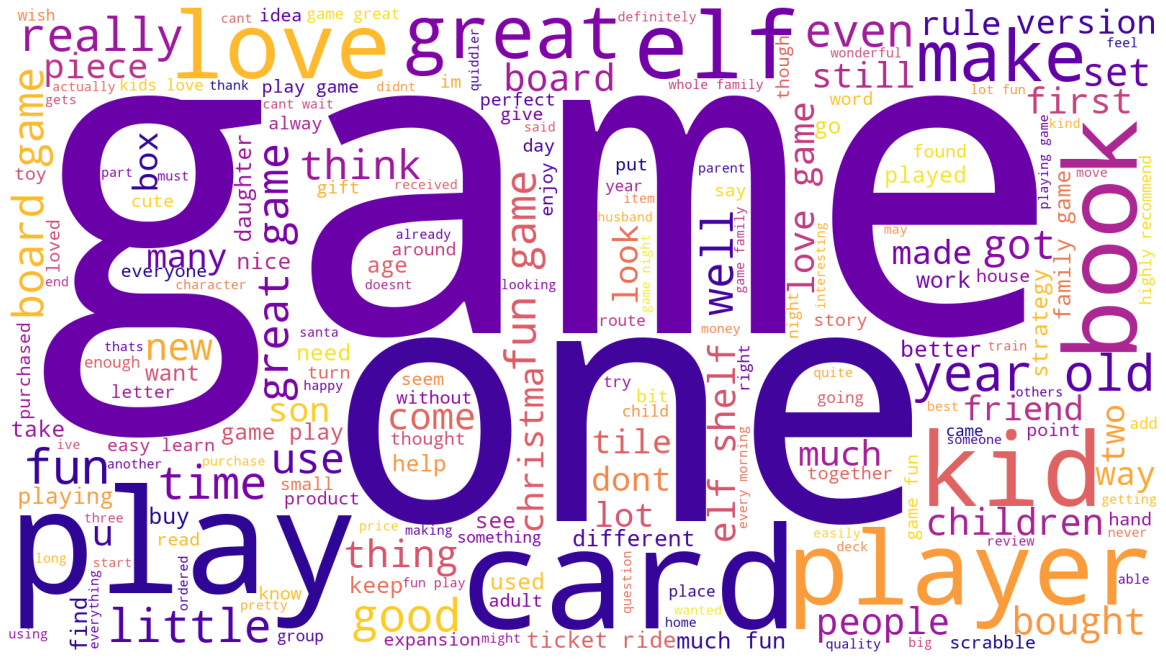

In [74]:
# Visualise word counts using WordCloud
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

**Report:** The most frequent words appearing the largest are 'game', fun, play, great, love, which conveys a positive sentiment.

## 6. Count the top 15 words that appear most often

In [76]:
# View the frequency distribution
fdist1 = FreqDist(tokens2)
fdist1

FreqDist({'game': 12379, 'fun': 5188, 'play': 4150, 'great': 4098, 'elf': 3285, 'love': 3031, 'one': 2982, 'family': 2818, 'kids': 2499, 'like': 2278, ...})

In [77]:
# Top 15 commonly used words across the comments.
# Import Counter
from collections import Counter

# Generate DF out of Counter
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                    columns=['Word', 'Frequency']).set_index('Word')
counts

,Frequency
Word,
game,12379
fun,5188
play,4150
great,4098
elf,3285
love,3031
one,2982
family,2818
kids,2499


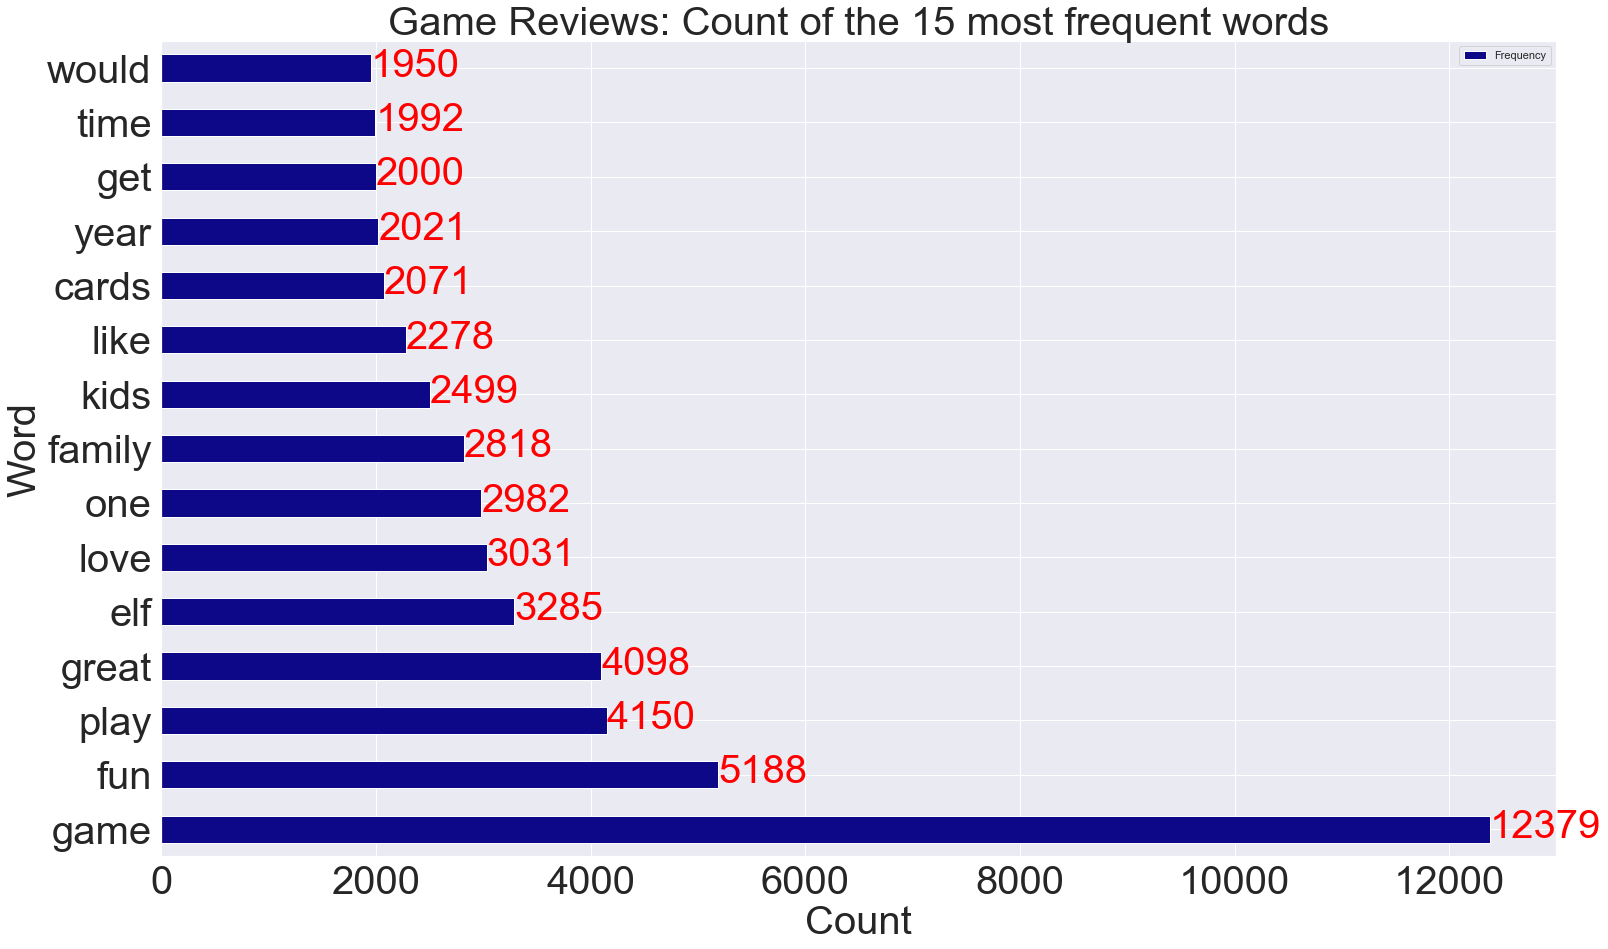

In [78]:
# Generate bar graph
ax = counts.plot(kind='barh', figsize=(25, 15), fontsize=40, colormap ='plasma')
ax.set_xlabel("Count", fontsize=40)
ax.set_ylabel("Word", fontsize=40)
ax.set_title("Game Reviews: Count of the 15 most frequent words", fontsize=40)

# Add annotations
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=40, color='red')


## 6. Generate Polarity Score to assess overall sentiment

TextBlob identifies the polarity and subjectiity of statement.

* polarity scores are assigned on a range
    * -1 is the lowest negative sentiment
    * +1 is the highest positive sentiment
* subjectivity ranges from 0 to 1
    * where 0 means fact-based and objective
    * 1 means opinion-based and subjective.

In [79]:
# Install TextBlob
!pip install textblob

# Import
from textblob import TextBlob

### Polarity Score

In [80]:
# [1] Define a function to extract a polarity score for the comment.
def generate_polarity(reviews_clean):
    return TextBlob(reviews_clean).sentiment[0]

# [2] Populate a new column with polarity scores for each comment.
reviews_clean['polarity'] = reviews_clean['reviewText'].apply(generate_polarity)

# [3] Preview the result.
reviews_clean['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

### Subjectivity Score

In [81]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(reviews_clean):
    return TextBlob(reviews_clean).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
reviews_clean['subjectivity'] = reviews_clean['reviewText'].apply(generate_subjectivity)

# Preview the result.
reviews_clean['subjectivity'].head(5)

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity, dtype: float64

## Visualise sentiment polarity scores on a histogram

**Report:** Overall reviews were neutral to positive with most reviews in between 0 to 0.25 polarity score. Very few reviews were negative as indicated in histogram above. Most frequently mentioned words

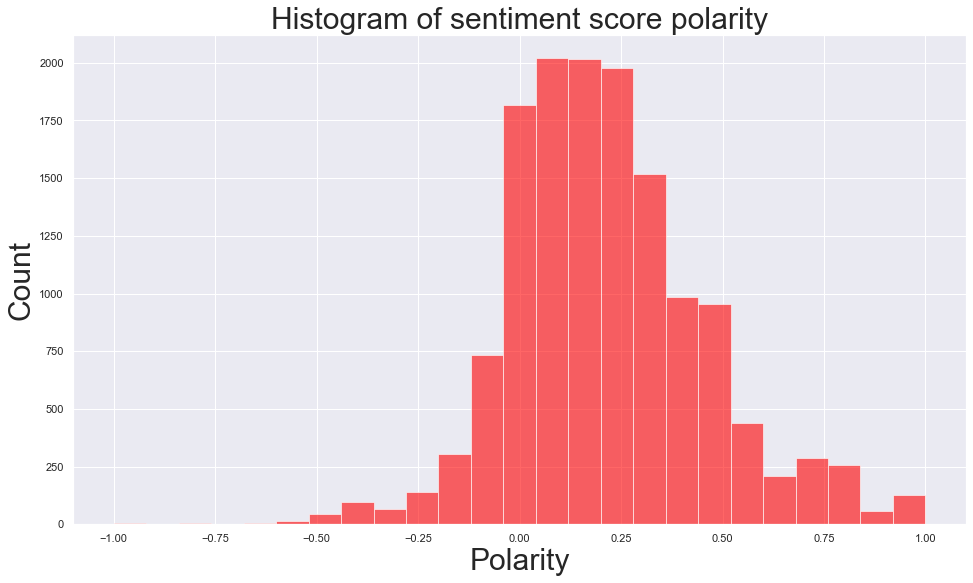

In [82]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews_clean['polarity'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Polarity', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.title('Histogram of sentiment score polarity', fontsize=30)

plt.show();

[Text(0.5, 1.0, 'Boxplot of Lego Reviews Polarity')]

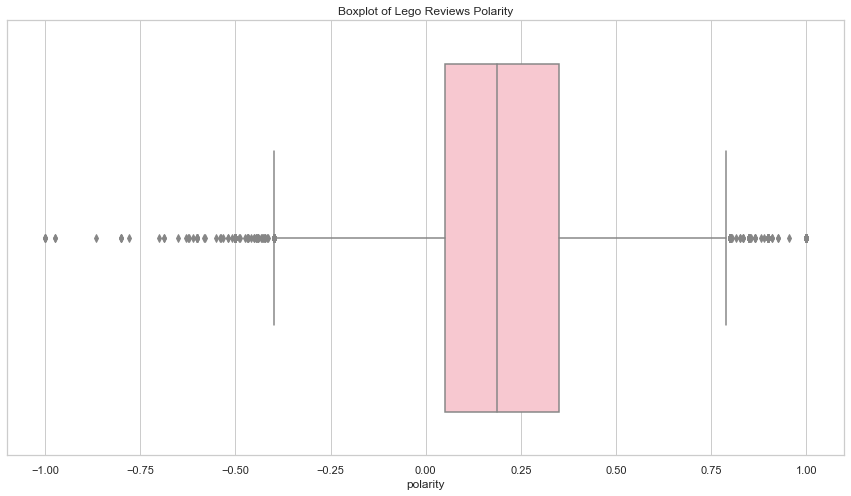

In [104]:
# Boxplot of polarity
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="whitegrid")
sns.boxplot(data=reviews_clean, x='polarity', color='pink').set(title='Boxplot of Lego Reviews Polarity')

## 7. Identify the top 20 positive and top 20 negative reviews from the data

extract the comments assigned the highest positive and lowest negative polarity scores

### 7.1 Top 20 reviews with positive sentiment

In [83]:
# [1] Create a DataFrame.
positive_sentiment = reviews_clean.nlargest(20, 'polarity')

# [2] Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['reviewText', 'polarity', 'subjectivity']]

# [3] Adjust the column width.
positive_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

,reviewText,polarity,subjectivity
7,came in perfect condition,1.000000,1.000000
164,awesome book,1.000000,1.000000
193,awesome gift,1.000000,1.000000
489,excellent activity for teaching selfmanagement skills,1.000000,1.000000
517,perfect just what i ordered,1.000000,1.000000
583,wonderful product,1.000000,1.000000
601,delightful product,1.000000,1.000000
613,wonderful for my grandson to learn the resurrection story,1.000000,1.000000
782,perfect,1.000000,1.000000
922,awesome,1.000000,1.000000


In [86]:
# View specific comment
positive_sentiment.at[517, 'reviewText']

'perfect just what i ordered'

In [85]:
# Export top 20 positive reviews to CSV
positive_sentiment.to_csv('positive_reviews.csv')

### 7.2 Top 20 reviews with negative sentiment

In [91]:
# [1] Create a DataFrame.
negative_sentiment = reviews_clean.nsmallest(20, 'polarity')

# [2] Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['reviewText', 'polarity', 'subjectivity']]

# [3] Adjust the column width.
negative_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

,reviewText,polarity,subjectivity
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000,1.000000
1987,kids did not like it thought it was boring,-1.000000,1.000000
3218,some of the suggestions are disgusting,-1.000000,1.000000
7812,awful we did not receive what was advertised we paid 30 for the boxes set with book we got the elf in a bag without the book,-1.000000,1.000000
7515,was the elf on the shelf but it didnt have the dvd i was very disappointed,-0.975000,0.975000
8861,i havent even taken it out of the box yet but its already falling apart i contacted customer service and never even got a response i am very disappointed in this product,-0.975000,0.975000
8198,i hate the holidays bcuz of the elf he was disgusting i hate him with my life he doesnot leave the shelf alone,-0.866667,0.933333
12386,i do not under stand how you keep score or read the scoring i i do not like that at all i can never play score with anyone at all i hate that i cant play points,-0.800000,0.900000
8531,cliche and stupid i should not drink and amazon,-0.800000,1.000000
8638,just stupid,-0.800000,1.000000


In [92]:
# View specific comment
negative_sentiment.at[2082, 'reviewText']

'this was a bit disappointing my students find it boring and the letters are hard to understand'

In [93]:
# Export top 20 negative reviews to CSV
negative_sentiment.to_csv('negative_reviews.csv')

## Document-Term Matrix
* extract features from text

### Positive Reviews Features

In [94]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(positive_sentiment['reviewText'])


In [96]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

              Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
awesome       0      1      1      0      0      0      0      0      0       
perfect       1      0      0      0      1      0      0      0      1       
wonderful     0      0      0      0      0      1      0      1      0       
best          0      0      0      0      0      0      0      0      0       
set           0      0      0      0      0      0      0      0      0       
product       0      0      0      0      0      1      1      0      0       
resurrection  0      0      0      0      0      0      0      1      0       
learn         0      0      0      0      0      0      0      1      0       
means         0      0      0      0      0      0      0      0      0       
ordered       0      0      0      0      1      0      0      0      0       

              Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
awesome       1       1       0       1       1       0       
perf

<AxesSubplot:>

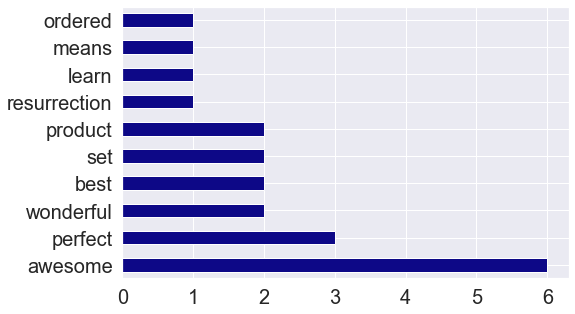

In [97]:
# Display using bar chart
document_term_matrix['total_count'].plot.barh(figsize=(8, 5), fontsize=20, colormap ='plasma')

### Negative Reviews Features

In [98]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(negative_sentiment['reviewText'])


In [99]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

              Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
like          0      1      0      0      0      0      0      1      0       
disappointed  0      0      0      0      1      1      0      0      0       
play          0      0      0      0      0      0      0      2      0       
did           1      1      0      1      0      0      0      0      0       
hate          0      0      0      0      0      0      2      1      0       
box           0      0      0      0      0      1      0      0      0       
elf           0      0      0      1      1      0      1      0      0       
book          0      0      0      2      0      0      0      0      0       
score         0      0      0      0      0      0      0      2      0       
product       0      0      0      0      0      1      0      0      0       

              Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
like          0       0       1       0       3       0       
disa

<AxesSubplot:>

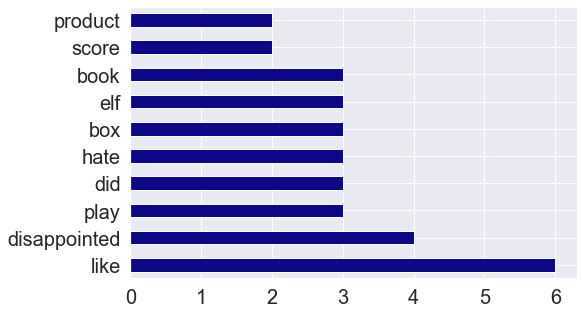

In [100]:
# Display using bar chart
document_term_matrix['total_count'].plot.barh(figsize=(8, 5), fontsize=20, colormap ='plasma')

**Report:** Overall the sentiment was positive from the lego game reviews. Customers thought that the game was awesome, fun and great as indicated in the top 20 positive comments. The top 20 negative comments helps identify features that the business can improve on to minimise negative reviews, such as related to product box, elf and book. These features can be further analysed to understand how these components can be improved.